In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns

In [111]:
train=pd.read_csv(r"train.csv")
train.shape

(31962, 3)

In [112]:
train.drop("id",axis=1)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation
...,...,...
31957,0,ate @user isz that youuu?ðððððð...
31958,0,to see nina turner on the airwaves trying to...
31959,0,listening to sad songs on a monday morning otw...
31960,1,"@user #sikh #temple vandalised in in #calgary,..."


In [113]:
train.isnull().any()

id       False
label    False
tweet    False
dtype: bool

In [114]:
test=pd.read_csv(r"test.csv")
test.shape

(17197, 2)

In [115]:
test.isnull().any()

id       False
tweet    False
dtype: bool

In [116]:
train.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [117]:
tweet=train["tweet"]

In [118]:
tweet.isnull().any()

False

In [119]:
train[train['label']==0]

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation
...,...,...,...
31956,31957,0,off fishing tomorrow @user carnt wait first ti...
31957,31958,0,ate @user isz that youuu?ðððððð...
31958,31959,0,to see nina turner on the airwaves trying to...
31959,31960,0,listening to sad songs on a monday morning otw...


In [120]:
train[train['label']==1]

,id,label,tweet
13,14,1,@user #cnn calls #michigan middle school 'buil...
14,15,1,no comment! in #australia #opkillingbay #se...
17,18,1,retweet if you agree!
23,24,1,@user @user lumpy says i am a . prove it lumpy.
34,35,1,it's unbelievable that in the 21st century we'...
...,...,...,...
31934,31935,1,lady banned from kentucky mall. @user #jcpenn...
31946,31947,1,@user omfg i'm offended! i'm a mailbox and i'...
31947,31948,1,@user @user you don't have the balls to hashta...
31948,31949,1,"makes you ask yourself, who am i? then am i a..."


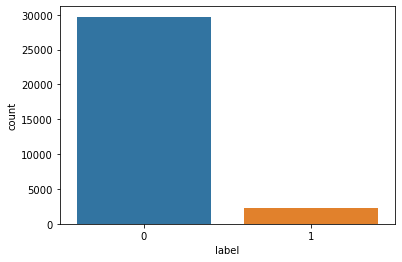

In [121]:
sns.countplot(train["label"])

# Text Mining or preprocessing

# 1.substitution or remove punctuation

In [122]:
tweet=tweet.replace("[^a-zA-Z]"," ",regex=True)

# 2. Lower all the values

In [123]:
tweet=tweet.str.lower()

# 3. Find stopwords

In [124]:
import nltk

In [125]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Anjali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [126]:
from nltk.corpus import stopwords


In [127]:
sw=stopwords.words("english")

# 3.Tokenization

In [128]:
tweet=tweet.str.split()

# 4. Remove stopwords from text and stemming


In [129]:
from nltk.stem.porter import PorterStemmer

In [130]:
ps=PorterStemmer()

In [131]:
swwords=[]

In [132]:
tweet=tweet.astype(str)

In [133]:
tweet

0        ['user', 'when', 'a', 'father', 'is', 'dysfunc...
1        ['user', 'user', 'thanks', 'for', 'lyft', 'cre...
2                            ['bihday', 'your', 'majesty']
3        ['model', 'i', 'love', 'u', 'take', 'with', 'u...
4           ['factsguide', 'society', 'now', 'motivation']
                               ...                        
31957              ['ate', 'user', 'isz', 'that', 'youuu']
31958    ['to', 'see', 'nina', 'turner', 'on', 'the', '...
31959    ['listening', 'to', 'sad', 'songs', 'on', 'a',...
31960    ['user', 'sikh', 'temple', 'vandalised', 'in',...
31961     ['thank', 'you', 'user', 'for', 'you', 'follow']
Name: tweet, Length: 31962, dtype: object

In [134]:
corpus=[]

In [135]:
for i  in range(0,31962):
        tweet=train["tweet"][i]
        tweet=tweet.replace("[^a-zA-Z]"," ")
        tweet=tweet.lower()
        tweet=tweet.split()
        swwords=[]
       # tweet=tweet.astype(str)
        
        for word in tweet:
            if word not in sw:
                swwords.append(ps.stem(word))
        tweet=' '.join(swwords)  
        corpus.append(tweet)

In [136]:
corpus

['@user father dysfunct selfish drag kid dysfunction. #run',
 "@user @user thank #lyft credit can't use caus offer wheelchair van pdx. #disapoint #getthank",
 'bihday majesti',
 '#model love u take u time urð\x9f\x93±!!! ð\x9f\x98\x99ð\x9f\x98\x8eð\x9f\x91\x84ð\x9f\x91 ð\x9f\x92¦ð\x9f\x92¦ð\x9f\x92¦',
 'factsguide: societi #motiv',
 '[2/2] huge fan fare big talk leave. chao pay disput get there. #allshowandnogo',
 '@user camp tomorrow @user @user @user @user @user @user @user dannyâ\x80¦',
 "next school year year exams.ð\x9f\x98¯ can't think ð\x9f\x98\xad #school #exam #hate #imagin #actorslif #revolutionschool #girl",
 'won!!! love land!!! #allin #cav #champion #cleveland #clevelandcavali â\x80¦',
 "@user @user welcom ! i'm #gr8 !",
 'â\x86\x9d #ireland consum price index (mom) climb previou 0.2% 0.5% may #blog #silver #gold #forex',
 'selfish. #orlando #standwithorlando #pulseshoot #orlandoshoot #biggerproblem #selfish #heabreak #valu #love #',
 'get see daddi today!! #80day #getting

# 5. Visualization of Wordcloud

In [137]:
from wordcloud import WordCloud

In [138]:
wc=WordCloud()

In [139]:
text_tweet=" ".join(corpus) 

In [140]:
wc_img=wc.generate(text_tweet)

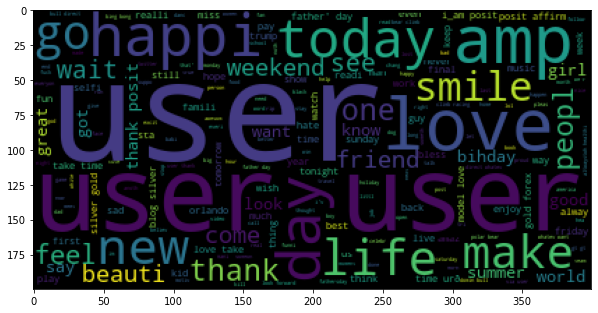

In [141]:
plt.figure(figsize=(10,10))
plt.imshow(wc_img)




# 6. Vectorization
    #converting words into vectors

from sklearn.feature_extraction.text import CountVectorizer

cv= CountVectorizer()

x=cv.fit_transform(corpus)

x

x.shape

In [142]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [143]:
tf=TfidfVectorizer(max_features=1600)

In [144]:
x=tf.fit_transform(corpus).toarray()

In [145]:
tf.get_feature_names()

['00',
 '000',
 '06',
 '10',
 '100',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '1st',
 '20',
 '2016',
 '2017',
 '21',
 '24',
 '25',
 '2nd',
 '30',
 '3d',
 '3rd',
 '40',
 '50',
 '70',
 '90',
 '99',
 'abl',
 'about',
 'absolut',
 'accept',
 'account',
 'achiev',
 'act',
 'action',
 'actor',
 'actual',
 'ad',
 'adapt',
 'add',
 'ador',
 'adult',
 'adventur',
 'affect',
 'affirm',
 'afraid',
 'african',
 'afternoon',
 'again',
 'age',
 'agenda',
 'ago',
 'agre',
 'ahead',
 'ain',
 'air',
 'airpo',
 'aist',
 'al',
 'album',
 'aliv',
 'all',
 'allahsoil',
 'allig',
 'allow',
 'almost',
 'alon',
 'alone',
 'along',
 'alreadi',
 'also',
 'altwaystoh',
 'alway',
 'always',
 'am',
 'amaz',
 'amazing',
 'america',
 'american',
 'amp',
 'amwrit',
 'analyt',
 'and',
 'angel',
 'anger',
 'angri',
 'angry',
 'anim',
 'anniversari',
 'announc',
 'annoy',
 'anoth',
 'answer',
 'anti',
 'anxieti',
 'anymor',
 'anymore',
 'anyon',
 'anyth',
 'app',
 'appar',
 'appl',
 'appreci',
 'a

In [146]:
y=train["label"].values

In [147]:
y.shape

(31962,)

# Train and test split

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2, random_state=42)

In [150]:
x_train.shape

(25569, 1600)

In [151]:
x_test.shape

(6393, 1600)

# Building a model

In [152]:
import keras

from keras.models import Sequential
from keras.layers import Dense

# Init NN model

In [153]:
model=Sequential()

# Add input Layer

In [154]:
model.add(Dense(input_dim=x_train.shape[1],kernel_initializer="random_uniform",activation="relu",units=200))

# Add hidden Layer

In [155]:
model.add(Dense(kernel_initializer="random_uniform",activation="relu",units=200))

# Add Output Layer

In [156]:
model.add(Dense(kernel_initializer="random_uniform",activation="sigmoid",units=1))

# Compile model

In [157]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [158]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 200)               320200    
_________________________________________________________________
dense_4 (Dense)              (None, 200)               40200     
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 201       
Total params: 360,601
Trainable params: 360,601
Non-trainable params: 0
_________________________________________________________________


In [159]:
train_history=model.fit(x_train,y_train,batch_size=32,epochs=10)

Epoch 1/10
800/800 [==============================] - 3s 4ms/step - loss: 0.1794 - accuracy: 0.9363
Epoch 2/10
800/800 [==============================] - 3s 4ms/step - loss: 0.1259 - accuracy: 0.9568
Epoch 3/10
800/800 [==============================] - 3s 4ms/step - loss: 0.1088 - accuracy: 0.9634
Epoch 4/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0840 - accuracy: 0.9722
Epoch 5/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0485 - accuracy: 0.9838
Epoch 6/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0245 - accuracy: 0.9928
Epoch 7/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0155 - accuracy: 0.9953
Epoch 8/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0123 - accuracy: 0.9962
Epoch 9/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0107 - accuracy: 0.9967
Epoch 10/10
800/800 [==============================] - 3s 4ms/step - loss: 0.0097 - accuracy: 0.9971

# Prediction

In [160]:
y_pred=model.predict_classes(x_test)

In [161]:
y_pred

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

In [197]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [198]:
print("test Accuracy_score",accuracy_score(y_pred,y_test)*100 ,'%')

test Accuracy_score 95.07273580478649 %


In [199]:

# calculating the f1 score for the validation set
print("f1 score :", f1_score(y_test, y_pred))

# confusion matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)


f1 score : 0.6341463414634145
[[5805  132]
 [ 183  273]]


# Real time prediction

In [180]:
my_tweet="suppo the #taiji fisherman! no bullying! no racism! #tweet4taiji #thecove #seashepherd  "

In [181]:
my_tweet=np.array([my_tweet])

In [182]:
my_tweet=tf.transform(my_tweet).toarray()

In [206]:
np.set_printoptions(precision=1,threshold=0.5,suppress=True)


In [207]:
model.predict(my_tweet)

array([[1.]], dtype=float32)

# Save the model

In [208]:
model.save("twitter.h5")

In [209]:
import joblib

In [212]:
joblib.dump(tf,"tf.pkl")

['tf.pkl']